LSTM time series + stock price prediction = FAIL
All too frequently when learning about time series prediction using artificial neural networks the temptation is to go right ahead and apply one to predicting the future price of either individual stocks, or the values of a stock market. In this little notebook we shall apply an LSTM (Long short-term memory) artificial neural network to the prediction of the , and see that there is something going *very* wrong...

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import seaborn as sns
from numpy.random import seed
seed(0)

This code imports several libraries that are commonly used in data analysis and visualization tasks.
  The first line imports the NumPy library as np, which is a popular library for mathematical operations in Python.
 The second line imports the pandas library as pd, which is a powerful library for data manipulation and analysis.
It provides data structures and functions for efficiently handling and analyzing large datasets.
 The third line imports the datetime module, which provides classes for manipulating dates and times in Python.
 The fourth line imports the pyplot module from the matplotlib library, which is a widely-used library for creating static, animated, and interactive visualizations in Python.
In this code, it is used to create plots.
 The fifth line imports the rcParams module from the matplotlib.pylab library.
This module allows customization of plot parameters, such as the size of the figure and the resolution of the output.
 The sixth line imports the seaborn library, which is built on top of matplotlib and provides a high-level interface for creating visually appealing and informative statistical graphics.
 The seventh line imports the numpy.random module's seed function and assigns it to the name seed.
The seed function is used to seed the random number generator, which ensures that the same random numbers are generated each time the code is run.
In this case, the seed is set to 0.
 Overall, this code sets up the necessary libraries and configurations for data analysis and visualization tasks, and ensures that the random number generation is consistent.


1. Obtain the stock market data
We shall install the package , the Yahoo! Finance market data downloader.

In [2]:
!pip -q install yfinance
import yfinance as yf

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda 4.9.2 requires ruamel_yaml>=0.11.14, which is not installed.
jupyterlab-git 0.11.0 requires nbdime<2.0.0,>=1.1.0, but you have nbdime 2.1.0 which is incompatible.
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


This code snippet begins by running the command "!pip -q install yfinance".
This command uses the pip package manager to install a package called "yfinance" in a quiet mode, meaning that the installation process will not display any output.
This package allows us to access financial data from the Yahoo Finance platform.
 After the installation, the next line of code imports the "yfinance" package under the alias "yf".
This allows us to use the functionality provided by the "yfinance" package by referring to it as "yf" in our code.
 Overall, this code is installing the "yfinance" package and importing it for further use.
The package will enable us to access financial data from Yahoo Finance.


and for this notebook we shall use data from the IBEX35 stock market

In [3]:
IBEX = yf.Ticker("^IBEX")
IBEX.info

{'exchange': 'MCE',
 'shortName': 'IBEX 35...',
 'exchangeTimezoneName': 'Europe/Madrid',
 'exchangeTimezoneShortName': 'CEST',
 'isEsgPopulated': False,
 'gmtOffSetMilliseconds': '7200000',
 'quoteType': 'INDEX',
 'symbol': '^IBEX',
 'messageBoardId': 'finmb_INDEXIBEX',
 'market': 'es_market',
 'previousClose': 8503.7,
 'regularMarketOpen': 8536.1,
 'twoHundredDayAverage': 8700.183,
 'trailingAnnualDividendYield': None,
 'payoutRatio': None,
 'volume24Hr': None,
 'regularMarketDayHigh': 8546.4,
 'navPrice': None,
 'averageDailyVolume10Day': 181567480,
 'totalAssets': None,
 'regularMarketPreviousClose': 8503.7,
 'fiftyDayAverage': 8439.052,
 'trailingAnnualDividendRate': None,
 'open': 8536.1,
 'toCurrency': None,
 'averageVolume10days': 181567480,
 'expireDate': None,
 'yield': None,
 'algorithm': None,
 'dividendRate': None,
 'exDividendDate': None,
 'beta': None,
 'circulatingSupply': None,
 'startDate': None,
 'regularMarketDayLow': 8432.9,
 'priceHint': 2,
 'currency': 'EUR',
 'r

The provided code is parsing the information of the IBEX index (^IBEX) using the yfinance library.
  Firstly, the code initializes a variable called "IBEX" and assigns it the value of the Ticker object for the IBEX index.
Ticker objects are part of the yfinance library and are used to retrieve financial data, such as historical prices and metadata, for a specific stock or index.
 By passing "^IBEX" as the argument to the Ticker function, the code is specifying that it wants to retrieve information for the IBEX index.
The "^" symbol is commonly used to represent indexes in finance.
 After the Ticker object is created, the code uses the info method to obtain the metadata for the IBEX index.
The info method returns a dictionary containing various details about the index, such as its name, ticker symbol, currency, exchange, and other relevant information.
 By calling the info method, the code retrieves the metadata for the IBEX index and assigns it to the variable "IBEX.info".
This information can be further utilized in the code to analyze or display relevant details about the index.
 Overall, the provided code fetches and stores the metadata of the IBEX index using the yfinance library.


Let us load in the data from the start of 2016

In [4]:
# get historical market data
IBEX_values = IBEX.history(start="2016-01-01",end="2021-03-01")

This code snippet retrieves historical market data for the IBEX index.
The IBEX index represents the stock market performance of the companies listed on the Madrid Stock Exchange in Spain.
 The code utilizes a method called "history" from the IBEX object.
This method likely interacts with an API or database to fetch the historical market data.
The object "IBEX" appears to be an instance of a class that provides access to such data.
 The method call specifies the start and end date for the data retrieval, with "2016-01-01" and "2021-03-01" respectively.
This means that the code retrieves the historical market data starting from January 1, 2016, and ending on March 1, 2021.
 The fetched data will likely include various attributes such as the date, opening price, closing price, high and low prices, trading volume, and potentially other relevant metrics.
The data will be stored in the variable "IBEX_values", which is presumably a data structure capable of holding tabular data like a pandas DataFrame or a similar object.
 This code is useful for conducting analysis, creating visualizations, or building models based on past performance of the IBEX index.
It allows users to study trends, patterns, and market behavior over the specified time period, which can be valuable for making informed investment decisions or conducting research related to the Spanish stock market.


What does this dataframe look like

In [5]:
IBEX_values

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-01-04,9429.789917,9440.890491,9263.690482,9313.190430,279173100,0,0
2016-01-05,9431.490134,9446.190314,9260.190508,9335.190430,208637600,0,0
2016-01-06,9330.289898,9330.289898,9122.589923,9197.390625,288658500,0,0
2016-01-07,8973.791099,9102.991169,8889.691571,9059.291016,395763700,0,0
2016-01-08,9093.290834,9137.990985,8909.191406,8909.191406,310720000,0,0
...,...,...,...,...,...,...,...
2021-02-22,8119.600098,8126.299805,8045.299805,8112.200195,221465900,0,0
2021-02-23,8128.000000,8259.900391,8107.600098,8252.099609,293160800,0,0
2021-02-24,8266.599609,8311.500000,8205.200195,8269.599609,225852700,0,0


The code snippet appears to refer to the variable "IBEX_values." Without further context or the code itself, it's difficult to precisely determine what this code does.
However, I can speculate on its purpose based on the variable name.
 "Ibex" refers to a stock index or stock market index that represents the Spanish stock market.
It is often used as a benchmark to track the overall performance of the Spanish stock market.
 Considering this, it is possible that the "IBEX_values" variable could contain or represent the historical or current values of the IBEX index.
It could store data such as the opening price, closing price, high and low prices, or other relevant information about the index's fluctuations over time.
 The purpose of this code could be to assign or manipulate the values of the IBEX index in some way.
It might involve mathematical calculations, data analysis, or presenting the information in a meaningful format, depending on the specific use case.
 Further analysis would require examining the code in its entirety or understanding the code's functionality within a larger program context.


let us plot this data, in particular the ``Close`` value

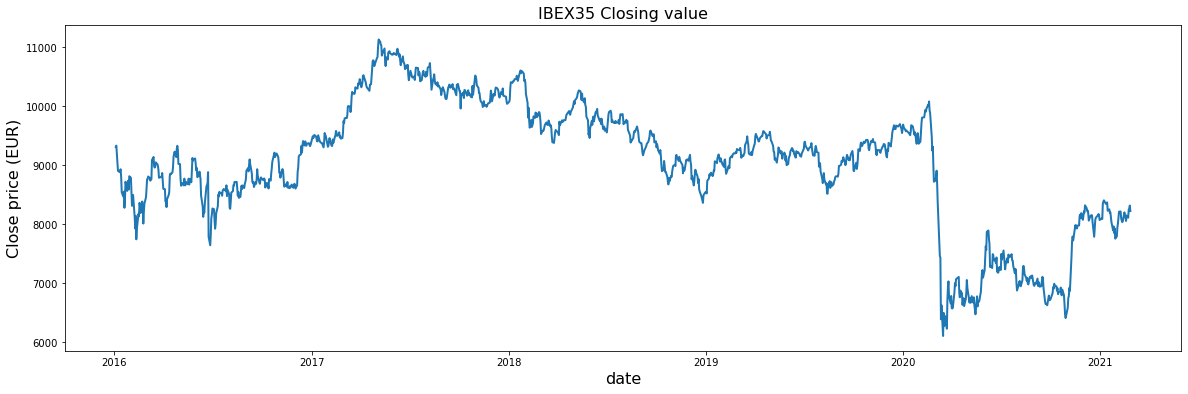

In [6]:
plt.figure(figsize=(20,6))
plt.plot(IBEX_values.index, IBEX_values['Close'], lw=2)
plt.xlabel("date")
plt.xlabel("date", fontsize=16)
plt.ylabel("Close price (EUR)", fontsize=16)
plt.title("IBEX35 Closing value", fontsize=16);

This code is using the matplotlib library in Python to create a line plot of the closing values of the IBEX35 index.
 The first line, "plt.figure(figsize=(20,6))", sets the figure size of the plot to be 20 inches wide and 6 inches tall.
This is useful for controlling the size of the plot when it is displayed or saved.
The second line, "plt.plot(IBEX_values.index, IBEX_values['Close'], lw=2)", creates the actual line plot.
IBEX_values.index is used as the x-axis values, representing the dates, and IBEX_values['Close'] is used as the y-axis values, representing the closing prices.
The "lw=2" parameter sets the line width to be 2 pixels.
The third and fourth lines, "plt.xlabel("date")" and "plt.ylabel("Close price (EUR)")", are used to set the x and y axis labels, respectively.
The "fontsize=16" parameter is used to increase the font size of the labels to make them more readable.
The fifth line, "plt.title("IBEX35 Closing value", fontsize=16)", sets the title of the plot to "IBEX35 Closing value" and also increases the font size of the title.
Finally, the semi-colon at the end of the code is used to suppress the output of the plot object itself, so only the resulting plot is displayed.


2. Create our training and test data
For the purposes of this exercise let us use the four years of data before the year 2020 as our training data, and use the data from the beginning of 2020 onward for prediction

In [7]:
# convert the Date column into a pandas datatime format
IBEX_values.index = pd.to_datetime(IBEX_values.index)

The code snippet provided converts the "Date" column in a pandas DataFrame called "IBEX_values" into a datetime format using the pd.to_datetime() function.
  The pd.to_datetime() function is a built-in function provided by the pandas library that is used to convert a given argument into a pandas datetime object.
It can be used to convert strings, integers, or other data types into a datetime format.
In this case, the argument being passed to the pd.to_datetime() function is the "index" of the "IBEX_values" DataFrame.
 By converting the "Date" column into a datetime format, the code allows for easier manipulation and analysis of the dates within the DataFrame.
This format provides a standardized way of representing dates and allows for operations such as filtering and sorting based on dates.
 Once the conversion is complete, the updated datetime index is assigned back to the "index" of the "IBEX_values" DataFrame.
This means that the "Date" column is no longer just a simple column of strings or integers representing dates, but is now a special index column that can be used to access and organize the data within the DataFrame based on dates.


In [8]:
from sklearn.preprocessing import MinMaxScaler
# rescale the whole dataset (ideally this shoud be done seperately on the train and test data in order to prevent data leakage, in particular 'look-ahead bias')
scaler = MinMaxScaler(feature_range=(0, 1))
#train_series = scaler.fit_transform(train_series)
IBEX_values['Close'] = scaler.fit_transform(IBEX_values[['Close']])

This code snippet is from the sklearn library and it imports the MinMaxScaler class from the preprocessing module.
The MinMaxScaler is a data transformation technique that is used to adjust the scale of features in a dataset.
It is commonly used in machine learning algorithms to normalize the data before training a model.
 The purpose of this code is to rescale the 'Close' values in the IBEX_values dataset.
The rescaling is done using the MinMaxScaler object, which is instantiated with the feature_range parameter set to (0, 1).
This means that the values will be scaled between 0 and 1.
 It is important to note that the comment in the code mentions that it would be ideal to separately rescale the train and test data to prevent data leakage and 'look-ahead bias'.
Data leakage refers to the situation where information from the test set is used to inform the training process.
Look-ahead bias occurs when future information is used to make predictions in the current time period, which is not realistic in practice.
 In the commented line that is currently commented out, it is indicated that the 'train_series' should be rescaled separately.
It seems that 'train_series' is another dataset that is not shown in the code snippet.
However, the line that assigns the rescaled values to the 'Close' column in the IBEX_values dataset is active.
This means that the 'Close' values in IBEX_values are transformed and the original values are replaced with the rescaled values.


In [9]:
# train / test split
train_data = IBEX_values.query('Date <  "2020-01-01"').reset_index(drop = False) 
test_data  = IBEX_values.query('Date >= "2020-01-01"').reset_index(drop = False)

This code performs a train/test split on a dataset called IBEX_values.
The dataset is likely a collection of stock market data for a specific stock index, possibly the IBEX index.
The goal of the train/test split is to divide the data into two subsets: one for training a model and another for testing the trained model's performance.
 The split is based on the date column in the dataset.
The "train_data" subset is constructed by querying the IBEX_values dataset for all rows where the "Date" is less than "2020-01-01".
This means that the "train_data" subset consists of all the historical data up until the end of 2019.
 Similarly, the "test_data" subset is created by querying the IBEX_values dataset for all rows where the "Date" is greater than or equal to "2020-01-01".
This subset contains all the data from the year 2020 onwards.
 The use of the reset_index(drop=False) function after each query ensures that the resulting subsets have a new index column, starting from 0.
This is useful for indexing purposes and allows for easier manipulations of the data.
 In summary, this code divides the IBEX_values dataset into two subsets: "train_data" containing historical data up until the end of 2019, and "test_data" containing data from the year 2020 onwards.
These subsets can then be used for training and evaluating models for predicting future stock market trends or conducting other analyses.


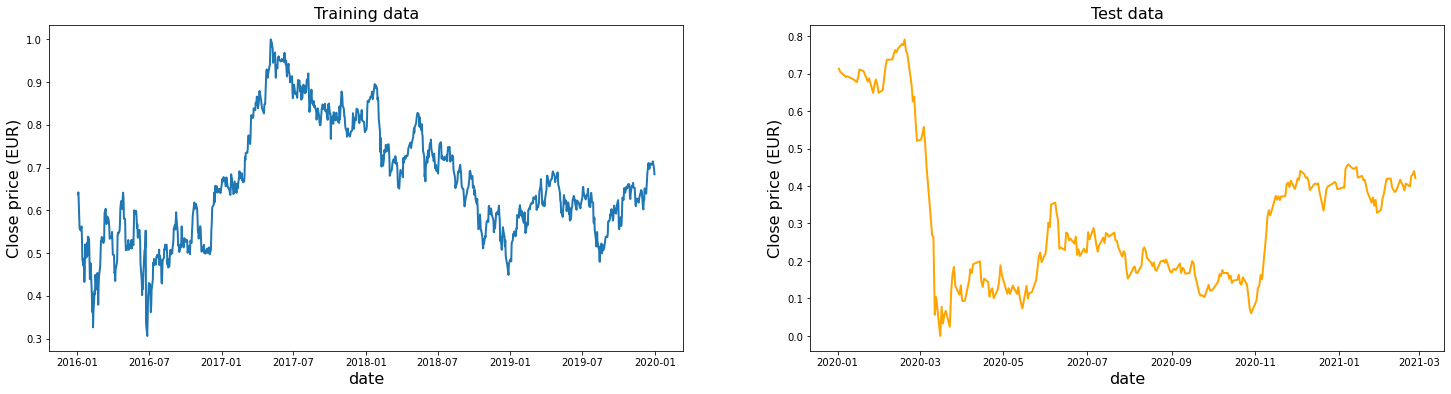

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 6))
ax1.plot(train_data.Date, train_data['Close'], lw=2)
ax1.set_xlabel("date", fontsize=16)
ax1.set_ylabel("Close price (EUR)", fontsize=16)
ax1.set_title("Training data", fontsize=16)
ax2.plot(test_data.Date, test_data['Close'], c='orange', lw=2)
ax2.set_xlabel("date", fontsize=16)
ax2.set_ylabel("Close price (EUR)", fontsize=16)
ax2.set_title("Test data", fontsize=16);

This code is plotting two graphs side by side using the matplotlib library.
  First, it creates a figure and two subplots using the `subplots()` function.
The figure size is set to 25 units wide and 6 units tall.
The number of rows and columns of subplots is set to 1 and 2 respectively.
The tuple `(ax1, ax2)` is used to assign the two subplots to variables `ax1` and `ax2` for further customization.
 In the next lines, the first subplot (ax1) is customized.
`ax1.plot()` function is used to plot the 'Close' price against the 'Date' column from the `train_data` DataFrame.
The `lw=2` parameter sets the line width of the plot.
`ax1.set_xlabel()`, `ax1.set_ylabel()`, and `ax1.set_title()` functions are used to set the x-axis label, y-axis label, and title of the first subplot respectively.
 The second subplot (ax2) is customized in a similar way.
The `ax2.plot()` function is used to plot the 'Close' price against the 'Date' column from the `test_data` DataFrame.
The `c='orange'` parameter sets the color of the line to orange.
The other customization functions `ax2.set_xlabel()`, `ax2.set_ylabel()`, and `ax2.set_title()` are used to set the axis labels and title of the second subplot.
 Overall, this code displays two graphs side by side, representing the 'Close' price of a stock over time for both training and test data.
The first graph shows the training data and the second graph shows the test data.


3. Our LSTM neural network
For our neural network we shall use the very same one that was used successfully to predict a sine wave in my notebook 

In [11]:
X_train = train_data.Date
y_train = train_data['Close']

X_test = test_data.Date
y_test = test_data['Close']

n_features = 1

train_series = y_train.values.reshape((len(y_train), n_features))
test_series  = y_test.values.reshape((len(y_test), n_features))

This code snippet is a part of a data preprocessing step for a machine learning model.
It is preparing the data to be used for training and testing the model.
 In the first set of lines, the code assigns the 'Date' column from the 'train_data' and 'test_data' datasets to the variables X_train and X_test, respectively.
This assumes that the 'Date' column contains the dates on which the stock market data was recorded.
 Similarly, in the next set of lines, the code assigns the 'Close' column from the 'train_data' and 'test_data' datasets to the variables y_train and y_test, respectively.
This assumes that the 'Close' column contains the closing prices of stocks on the corresponding dates.
 The next line defines the number of features in the dataset, which is set to 1.
This suggests that the only feature being considered in this case is the 'Close' price of the stocks.
 The last two lines convert the y_train and y_test data into a series format using the 'values' attribute, and then reshape them into a two-dimensional array with the dimensions (number of samples, number of features).
Here, since we have set n_features to 1, the shape of the arrays will be (number of samples, 1).
 Overall, this code snippet is extracting the 'Date' and 'Close' columns from the train_data and test_data datasets, and preparing the y_train and y_test data in the desired format for training and testing a machine learning model.


we shall be using a ``look_back = 20``. This means that we shall be using 20 previous data points in order to predict the next data point

In [12]:
%%time

from keras.preprocessing.sequence import TimeseriesGenerator

look_back = 20

train_generator = TimeseriesGenerator(train_series, train_series,
                                      length        = look_back, 
                                      sampling_rate = 1,
                                      stride        = 1,
                                      batch_size    = 10)

test_generator = TimeseriesGenerator(test_series, test_series,
                                      length        = look_back, 
                                      sampling_rate = 1,
                                      stride        = 1,
                                      batch_size    = 10)

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

n_neurons  = 4
model = Sequential()
model.add(LSTM(n_neurons, input_shape=(look_back, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse');

model.fit(train_generator,epochs=300, verbose=0);

CPU times: user 4min 30s, sys: 26 s, total: 4min 56s
Wall time: 3min 9s


This code segment trains a Long Short-Term Memory (LSTM) neural network model for time series forecasting.
In the first few lines, the code imports the necessary modules from the Keras library for preprocessing and building the model.
It also sets the value of the `look_back` variable to 20, which determines the number of previous time steps used as input to predict the next time step.
 The code then creates two instances of the `TimeseriesGenerator` class: `train_generator` and `test_generator`.
These generators are used for creating batches of time series data that will be fed into the LSTM model during training.
They take the `train_series` and `test_series` as inputs, which are the time series data used for training and testing the model, respectively.
The `length` parameter is set to `look_back`, indicating that the generator should generate sequences of length 20.
The `sampling_rate` and `stride` parameters are set to 1, indicating that the sequences are sampled at a rate of 1 and the stride for sliding the window is also 1.
The `batch_size` is set to 10, meaning that each batch fed into the model during training will contain 10 sequences of length 20.
 Next, the code creates an empty sequential model object using the `Sequential` class from Keras.
Sequential models are a linear stack of layers.
In this model, one LSTM layer is added with `n_neurons` number of neurons and with an input shape of `(look_back, n_features)`, where `n_features` is the number of features at each time step.
The LSTM layer is followed by a fully connected `Dense` layer with 1 unit, which represents the output prediction.
The model is then compiled with the `adam` optimizer and the mean squared error (`mse`) as the loss function.
 Finally, the code calls the `fit` method on the model and passes the `train_generator` as the training data.
The `epochs` parameter is set to 300, indicating the number of times the model will iterate over the entire training dataset.
The `verbose` parameter is set to 0, which means that no progress updates will be displayed during training.
 Overall, this code segment trains an LSTM model using time series data and generates predictions for the next time steps.
The `TimeseriesGenerator` is used to prepare the data for training, and the model is trained for 300 epochs using the mean squared error loss function.


In [13]:
test_predictions  = model.predict(test_generator)

The given code snippet is generating predictions for a test dataset using a machine learning model.
  In more detail, the code is first calling the "predict" function on a model object.
This model object is assumed to have been previously trained on a dataset using a machine learning algorithm.
The "predict" function is a method typically found in machine learning libraries such as TensorFlow or scikit-learn, and it is used to make predictions on new, unseen data.
 In this case, the "predict" function is being applied to a "test_generator".
A test generator is a data generator object that provides a stream of test data in batches, rather than loading the entire test dataset into memory at once.
This is particularly useful when dealing with large datasets that do not fit into memory.
 The output of the "predict" function, which contains the predictions generated by the model for each test example, is assigned to a variable called "test_predictions".
This variable can then be used for further analysis or evaluation of the model's performance on the test data, such as computing evaluation metrics or comparing the predictions to the true labels.


In [14]:
# uncomment to undo the scaling
#test_data['Close'] = scaler.inverse_transform(test_data[['Close']])
#test_predictions   = scaler.inverse_transform(test_predictions)

This code block is written in Python and involves the use of a scaler to perform a transformation on some data.
The commented line indicates that the scaling is being undone.
  In the first line, the code is attempting to reverse the scaling operation performed on the 'Close' column of the 'test_data' dataframe.
It uses the 'inverse_transform' method of the scaler object to achieve this.
The scaler object is likely an instance of a class that implements a specific scaling algorithm, such as MinMaxScaler or StandardScaler.
 The 'inverse_transform' method takes an argument that represents the data to be transformed back to its original value.
In this case, the 'test_data' dataframe is subsetted to only include the 'Close' column, and the result of the transformation is assigned back to the 'Close' column of the 'test_data' dataframe.
  The next line of code attempts to perform a similar reversal of the scaling operation on a variable called 'test_predictions'.
The assumptions are that this variable stores the predictions made on the 'test_data' and that it was scaled using the same scaling object as 'test_data'.
Again, the 'inverse_transform' method is used with the 'test_predictions' variable as the argument, and the result is assigned back to the same variable.


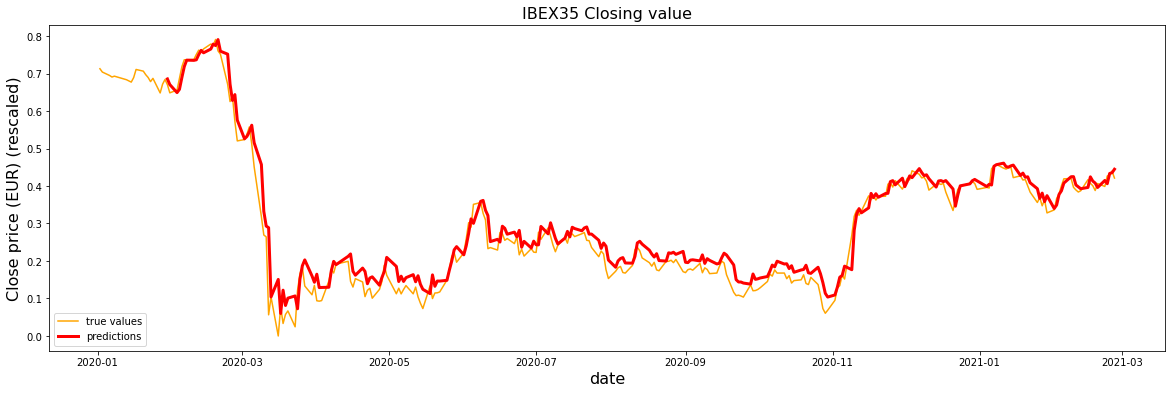

In [15]:
plt.figure(figsize=(20,6))
plt.plot(test_data.Date, test_data['Close'], c='orange',label='true values')
plt.plot(X_test[20:],test_predictions, lw=3, c='r',linestyle = '-', label='predictions')
plt.legend(loc="lower left")
plt.xlabel("date", fontsize=16)
plt.ylabel("Close price (EUR) (rescaled)", fontsize=16)
plt.title("IBEX35 Closing value", fontsize=16);

This code is used to create a figure with a specific size (20 inches wide and 6 inches tall) using the plt.figure() function.
The figure is used to plot two lines on a graph.
 The first line is plotted using the plt.plot() function.
It takes two parameters: the x-axis values (test_data.Date) and the y-axis values (test_data['Close']).
The line is plotted in the color orange and is labeled as 'true values'.
 The second line is also plotted using the plt.plot() function.
It takes two parameters: the x-axis values (X_test[20:]) and the y-axis values (test_predictions).
This line is plotted in the color red with a line width of 3 and a solid line style.
It is labeled as 'predictions'.
 The plt.legend() function is used to create a legend for the plot.
The 'lower left' location is specified for the legend.
 The plt.xlabel() function is used to set the x-axis label to 'date' with a font size of 16.
 The plt.ylabel() function is used to set the y-axis label to 'Close price (EUR) (rescaled)' with a font size of 16.
 The plt.title() function is used to set the title of the graph to 'IBEX35 Closing value' with a font size of 16.


Wow, that is amazingly good!
Our LSTM neural network seems to do a wonderful job, it even predicts the huge 'COVID' drop seen around March 2020. 

...but wait, *how is that even possible if there was no 'COVID' like drop in the training data?!... hmm*

Let us take a closer look at the last 20 days of test data, along with our predictions (note that there is no data on the weekends)

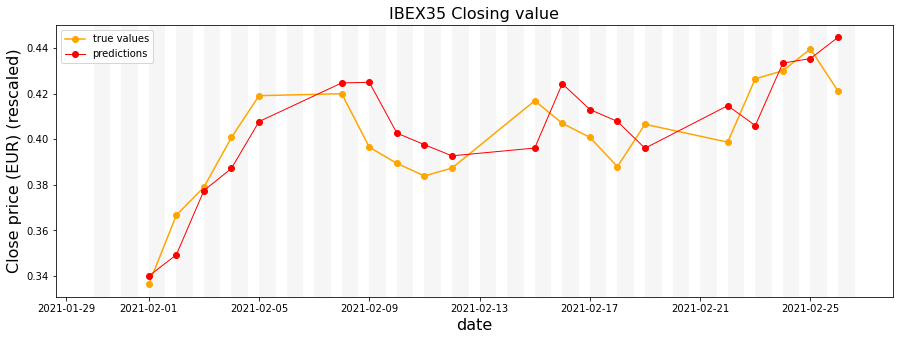

In [16]:
n_days = 20
last_n_days = len(test_data)-n_days

plt.figure(figsize=(15,5))
plt.plot(test_data.Date[last_n_days:], test_data['Close'][last_n_days:], c='orange',marker='o',label='true values')
plt.plot(X_test[last_n_days:],test_predictions[last_n_days-20:],lw=1, c='r', marker='o', label='predictions')
plt.legend(loc="upper left")
plt.xlabel("date", fontsize=16)
plt.ylabel("Close price (EUR) (rescaled)", fontsize=16)
plt.title("IBEX35 Closing value", fontsize=16)

# shade in the days for better visualization
date2 = IBEX_values.tail(1).index.item()
date1 = date2 - pd.Timedelta(days=n_days+7) # days added for weekends etc.
for i in pd.date_range(date1, date2, periods=n_days+8):
    # shade in 0.6 of each day
    plt.axvspan(i,i+pd.Timedelta(days=0.6), facecolor='lightgrey', alpha=0.2)
plt.show();

This code snippet visualizes the true values and predictions for the closing price of a stock (IBEX35) over a given period of time.
  First, the variable `n_days` is set to 20, indicating that the visualization will include data for the last 20 days.
The variable `last_n_days` is also calculated, which is the index of the starting point of the last 20 days of data in the `test_data` dataset.
 Next, a figure for the plot is created with a size of 15x5.
The actual closing values are plotted using `plt.plot()` by passing in the corresponding dates and the 'Close' column from the `test_data` dataframe.
These values are represented by orange markers ('o') on the plot.
  The predictions for the closing values are also plotted using `plt.plot()`.
The `X_test` and `test_predictions` variables are used for this, where `X_test` represents the input features for the model and `test_predictions` represents the predicted closing prices.
Only the last 20 predictions are plotted, indicated by the index value `last_n_days-20`.
These values are represented by red markers ('o') on the plot.
 A legend is added to the plot using `plt.legend()`, specifying the location as "upper left".
The x-axis label is set to "date" and the y-axis label is set to "Close price (EUR) (rescaled)".
The title of the plot is set to "IBEX35 Closing value".
 To enhance the visualization, the code shades in the days on the plot.
The date range from `date1` to `date2` is calculated, where `date2` represents the last date in the `IBEX_values` dataset and `date1` is calculated by subtracting the number of days `n_days+7`.
This is done to include additional days to account for weekends or other non-trading days.
For each date in the range, a shaded rectangle is added using `plt.axvspan()`, spanning 0.6 of each day, with a facecolor of 'lightgrey' and an alpha value of 0.2, indicating a lighter shade.
 Finally, the plot is displayed using `plt.show()`.


we can see on this scale that what is actually happening is that our predictions for each day are basically the value of the day before, plus a little extra!

4. Extrapolation: Ok, maybe not *so* good after all...
This time, rather than looking back on the last 20 test data values and predicting only the very next value, we shall now keep the prediction value, and store it as part of our input data


In [17]:
extrapolation = list()
seed_batch    = y_test[:look_back].values.reshape((1,look_back, n_features))
current_batch = seed_batch

for i in range(len(test_data)):
    predicted_value = model.predict(current_batch)[0]
    extrapolation.append(predicted_value) 
    current_batch = np.append(current_batch[:,1:,:],[[predicted_value]],axis=1)

This code is performing a time series extrapolation using a trained model.
  First, an empty list called `extrapolation` is initialized.
  Next, a batch of data called `seed_batch` is created.
The `y_test[:look_back]` part slices the `y_test` data up to a certain length defined by `look_back`.
This sliced batch is then reshaped into a 3-dimensional array of shape `(1, look_back, n_features)` using the `.values.reshape()` method.
The variables `look_back` and `n_features` may have been defined earlier in the code.
  Then, `current_batch` is assigned the value of `seed_batch`.
  A loop is then executed for each data point in `test_data`.
This loop iterates `len(test_data)` number of times.
  Inside the loop, the trained model is used to predict the next value in the time series using the `model.predict()` method.
The `current_batch` is passed as input to the `model.predict()` method, and the predicted value is extracted using `[0]` indexing.
  The predicted value is then appended to the `extrapolation` list.
  Finally, `current_batch` is updated.
The numpy method `np.append()` is used to replace the first column of `current_batch` with the predicted value.
The slicing `current_batch[:,1:,:]` selects all elements of `current_batch` except for the first column, and `[[predicted_value]]` creates a new column with the predicted value.
The `axis=1` parameter specifies that the new column should be added horizontally.
This updated `current_batch` is then assigned to itself.
  Overall, this code takes a given amount of initial data (`look_back`), feeds it into a trained model to make predictions, and then uses these predictions to continuously update the data batch for making future predictions in a time series extrapolation task.
The resultant predictions at each step are stored in the `extrapolation` list.


now let us take a look at the results, and see our LSTM model in all its glory

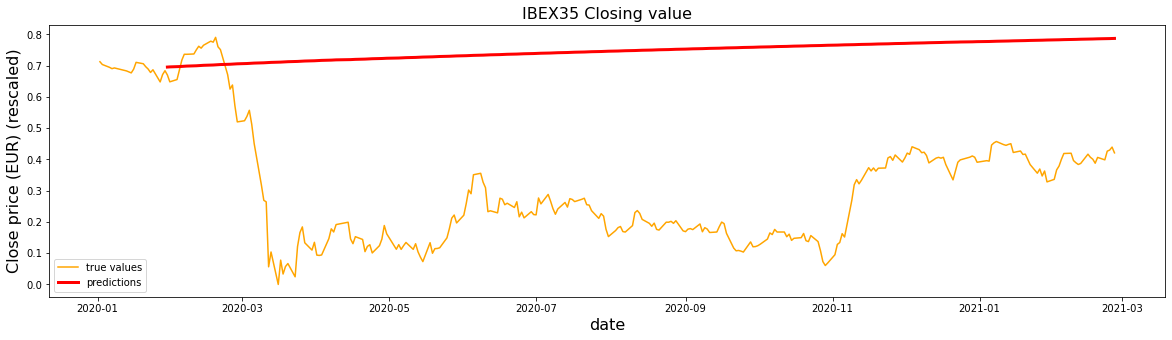

In [18]:
plt.figure(figsize=(20,5))
plt.plot(test_data.Date, test_data['Close'], c='orange',label='true values')
plt.plot(X_test[20:],extrapolation[20:], lw=3, c='r',linestyle = '-', label='predictions')
plt.legend(loc="lower left")
plt.xlabel("date", fontsize=16)
plt.ylabel("Close price (EUR) (rescaled)", fontsize=16)
plt.title("IBEX35 Closing value", fontsize=16);

This code is used to create and customize a line plot using the matplotlib library in Python.
The plot is intended to visualize the true values and predictions of the closing prices of a financial asset, specifically the IBEX35 index.
 The first line of code, "plt.figure(figsize=(20,5))", creates a new figure with the specified size of 20 inches in width and 5 inches in height.
This sets up the canvas on which the line plot will be drawn.
 The next line, "plt.plot(test_data.Date, test_data['Close'], c='orange',label='true values')", plots the true values of the closing prices.
It takes two arguments - the x-values (dates) from the test_data dataframe and the y-values (closing prices) from the 'Close' column of the same dataframe.
The 'c='orange'' argument sets the color of the line to orange, and the 'label='true values'' argument assigns a label to this line for the legend.
 The third line, "plt.plot(X_test[20:],extrapolation[20:], lw=3, c='r',linestyle = '-', label='predictions')", plots the predicted values of the closing prices.
It takes two arguments - the x-values (dates) from the X_test array (starting from index 20) and the y-values (predictions) from the extrapolation array (also starting from index 20).
The 'lw=3' argument sets the line width to 3, the 'c='r'' argument sets the color of the line to red, and the 'linestyle='-' argument sets the line style to a solid line.
The 'label='predictions'' argument assigns a label to this line for the legend.
 The next line, "plt.legend(loc="lower left")", adds a legend to the plot.
The 'loc="lower left"' argument specifies the location of the legend to be in the lower left corner of the plot.
 The line "plt.xlabel("date", fontsize=16)" sets the x-axis label of the plot to "date" with a font size of 16.
Similarly, "plt.ylabel("Close price (EUR) (rescaled)", fontsize=16)" sets the y-axis label to "Close price (EUR) (rescaled)" with a font size of 16.
 Finally, "plt.title("IBEX35 Closing value", fontsize=16)" adds a title to the plot, which is "IBEX35 Closing value" with a font size of 16.


we can now see what is *really* going on; the neural net is predicting that today's stock price is basically yesterdays stock price + a little (hence the slight gradient). Our initial predictions looked good because, on a large scale, we do not notice that our model was basically mimicking yesterdays price.

5. What went wrong?
Why did we fail?  There is far more going on in the stock market data than can be captured simply by looking at a univariate series of historical values. The stock prices are not the result of a couple of underlying causal factors, but a rather a multitude of contributions as well as a good dose of human irrationality (*Kahneman, Thaler*). Indeed it has been posited that stock data is almost random (*Fama, Malkiel*).

Let us plot a histogram of the daily percentage change in the `Close` value in our training data, and compare it to a :

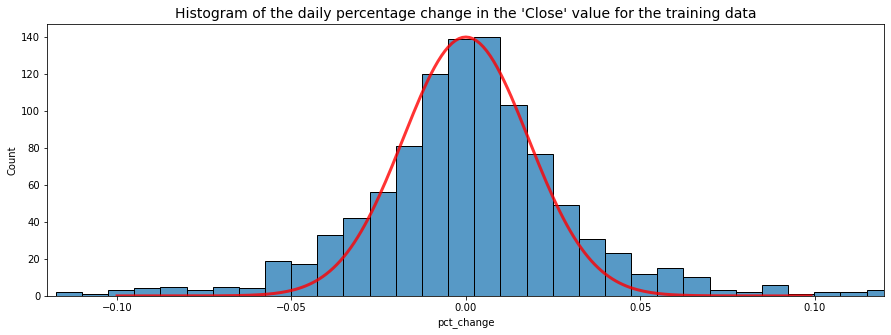

In [19]:
train_data['pct_change'] = train_data.Close.pct_change(periods = 1)

x = np.arange(-0.1, 0.1, 0.001)

# define a Gaussian function
def Gaussian(x,mu,sigma,A):
    return A*np.exp(-0.5 * ((x-mu)/sigma)**2)

plt.figure(figsize = (15,5))
ax = sns.histplot(train_data['pct_change'], binwidth=0.0075)
# overlay a Gaussian distribution, parameters were picked by eye
ax = plt.plot(x,Gaussian(x,0,0.018,140),color='r',lw=3,label='Gaussian #1', alpha=0.8)
plt.title("Histogram of the daily percentage change in the 'Close' value for the training data", size=14)
plt.xlim(-0.12, 0.12);

The given code performs several operations.
  First, it calculates the percentage change in the 'Close' value of the training data.
It assigns the result to the 'pct_change' column in the 'train_data' DataFrame using the 'pct_change' method.
The 'pct_change' method calculates the percentage change between each element and the previous element, with a period of 1.
 Next, the code creates an array 'x' using the numpy 'arange' function.
This array contains numbers ranging from -0.1 to 0.1 with a step size of 0.001.
 After that, a Gaussian function is defined using the 'def' keyword.
This function takes 'x', 'mu', 'sigma', and 'A' as input arguments and returns the value of A multiplied by the exponential term.
This Gaussian function is a probability distribution function that represents a normal distribution or bell curve.
 Then, a figure is created using the 'plt.figure' function from the matplotlib library.
The figure size is set to 15x5.
  Next, a histogram plot of the 'pct_change' column in the 'train_data' DataFrame is created using the 'sns.histplot' function from the seaborn library.
The 'binwidth' parameter specifies the width of each bin in the histogram.
 To overlay a Gaussian distribution on the histogram plot, the 'plt.plot' function is used.
The 'x' array is passed as the x-coordinates, and the Gaussian function is passed with specific parameter values for 'mu', 'sigma', and 'A'.
These parameter values were chosen visually.
The line color is set to red ('r'), line width is set to 3, label is set to 'Gaussian #1', and transparency (alpha) is set to 0. Finally, the plot title is set, x-axis limit is specified, and the plot is displayed.
The title says "Histogram of the daily percentage change in the 'Close' value for the training data", and the x-axis limit is set to -0.12 and 0.12.


"Considering that the subsequent point in a random walk originates from the prior point, we should focus on the variances between consecutive values rather than the absolute values."

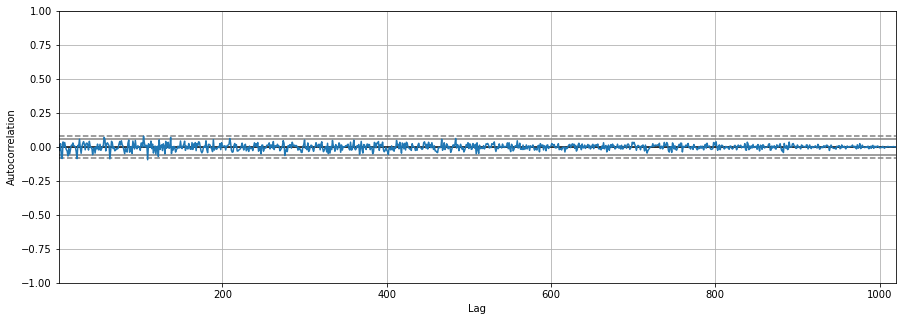

In [20]:
diff_train_data_close = train_data['Close'].diff()
# drop the initial nan
diff_train_data_close = diff_train_data_close.dropna()
# now for the autocorrelation plot
rcParams['figure.figsize'] = 15, 5
pd.plotting.autocorrelation_plot(diff_train_data_close);

The given code calculates the difference between consecutive values of the 'Close' column in the 'train_data' DataFrame and assigns it to the variable 'diff_train_data_close'.
 The next line drops the initial NaN (Not a Number) value from the 'diff_train_data_close' series.
  After that, the code sets the figure size of the plot to be created using the rcParams dictionary with the key 'figure.figsize' set to (15, 5), indicating a width of 15 units and a height of 5 units.
 Finally, the code creates an autocorrelation plot using the 'autocorrelation_plot()' function from the pandas plotting module.
This plot shows the correlation between the 'diff_train_data_close' series and its lagged versions.
It helps identify any significant patterns or trends in the data.
The semicolon at the end of the line suppresses the display of additional information such as the plot axes and title.
 Overall, this code calculates the difference between consecutive values of a column in a DataFrame, drops the initial NaN value, and then visualizes the autocorrelation of the resulting series.


"It appears we're dealing with a random walk, given the absence of any autocorrelation signs at any lag.

Essentially, our LSTM couldn't find any substantial pattern to model, so it settled on an average value complemented by a minor gradient. A simple model, represented as \(Close_t \propto Close_{t-1}\), would have sufficed.

This approach is often referred to as the naïve forecast or persistence model. In the context of a random walk, where the next value is unpredictable by definition, relying on the present value to predict the subsequent one—termed the one-step naïve forecast—provides the most optimal results.

Let's juxtapose our LSTM model against such a basic forecast."

In [21]:
# create a naïve forecast
test_data['naive'] = test_data['Close'].shift(1)

This code is used to create a naïve forecast for a dataset called 'test_data'.
The 'Close' column in the 'test_data' dataset represents the closing prices of an asset or stock.
  The line of code 'test_data['naive'] = test_data['Close'].shift(1)' is assigning a new column called 'naive' to the 'test_data' dataset.
The values in this new column are obtained by shifting the values in the 'Close' column one position upwards.
This means that the value in the 'naive' column for a particular row will be the closing price of the previous row.
 By creating this naïve forecast, we are assuming that the future value of the asset will be the same as the most recent observed value.
This is a simple and commonly used forecasting method that does not take into account any other factors or patterns in the data.
The purpose of using a naïve forecast is to establish a baseline prediction against which more advanced forecasting methods can be compared.


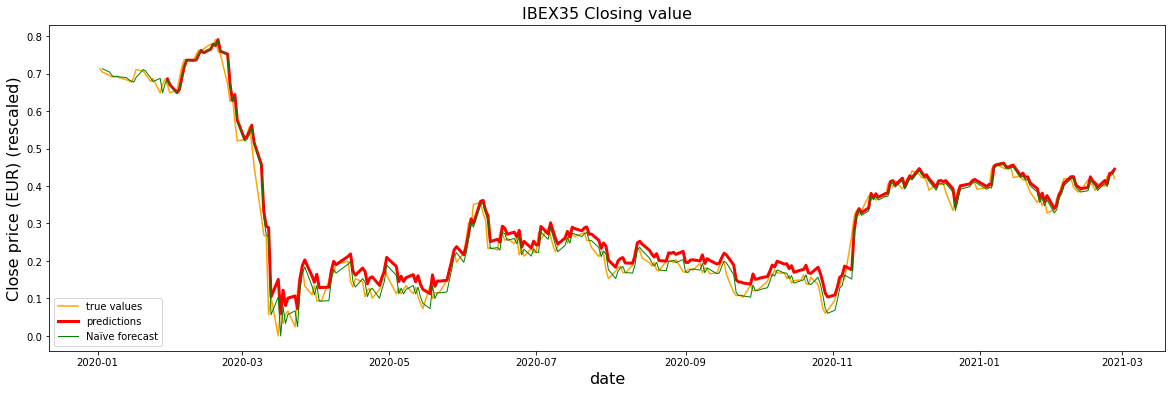

In [22]:
plt.figure(figsize=(20,6))
plt.plot(test_data.Date, test_data['Close'], c='orange',label='true values')
plt.plot(X_test[20:],test_predictions, lw=3, c='r',linestyle = '-', label='predictions')
plt.plot(test_data.Date,test_data['naive'], lw=1, c='green',linestyle = '-', label='Naïve forecast')
plt.legend(loc="lower left")
plt.xlabel("date", fontsize=16)
plt.ylabel("Close price (EUR) (rescaled)", fontsize=16)
plt.title("IBEX35 Closing value", fontsize=16);

This code is using the matplotlib library to create a figure and plot three different lines on it.
  The `plt.figure(figsize=(20,6))` line creates a figure with a size of 20 by 6 inches.
 The `plt.plot(test_data.Date, test_data['Close'], c='orange',label='true values')` line plots the Close prices from the `test_data` dataset on the x-axis and the y-axis.
The line is colored orange and labeled 'true values'.
 The `plt.plot(X_test[20:],test_predictions, lw=3, c='r',linestyle = '-', label='predictions')` line plots the predicted values of the Close prices on the x-axis and the y-axis.
The line is colored red, has a line width of 3, and is labeled 'predictions'.
  The `plt.plot(test_data.Date,test_data['naive'], lw=1, c='green',linestyle = '-', label='Naïve forecast')` line plots the naive forecast values of the Close prices on the x-axis and the y-axis.
The line is colored green, has a line width of 1, and is labeled 'Naïve forecast'.
  The `plt.legend(loc="lower left")` line adds a legend to the plot, specifying that it should be placed in the lower left corner of the figure.
 The `plt.xlabel("date", fontsize=16)` line adds a label to the x-axis, specifying that it represents the date.
The fontsize is set to 16.
 The `plt.ylabel("Close price (EUR) (rescaled)", fontsize=16)` line adds a label to the y-axis, specifying that it represents the Close price in EUR (rescaled).
The fontsize is set to 16.
 The `plt.title("IBEX35 Closing value", fontsize=16)` line adds a title to the plot, specifying that it represents the closing value of the IBEX35 index.
The fontsize is set to 16.
  Overall, this code creates a figure and plots the true values, predictions, and naive forecast values of the Close prices for the IBEX35 index.
It also adds labels and a title to the plot for clarity.


Model performance
Let us now take a look at some performance metrics, namely the  and the :

In [23]:
# first create a pad of length "look_back"
twenty_zeros = np.zeros((look_back,1))
# now insert the LSTM predictions into the dataframe
test_data["LSTM"] = np.concatenate([twenty_zeros,test_predictions])

from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error

print("Naïve model MSE: %.4f" % mean_squared_error(test_data[20:]["Close"], test_data[20:]["naive"]))
print("LSTM model  MSE: %.4f" % mean_squared_error(test_data[20:]["Close"], test_data[20:]["LSTM"]))
print("Naïve model MAE: %.4f" % median_absolute_error(test_data[20:]["Close"], test_data[20:]["naive"]))
print("LSTM model  MAE: %.4f" % median_absolute_error(test_data[20:]["Close"], test_data[20:]["LSTM"]))

Naïve model MSE: 0.0009
LSTM model  MSE: 0.0013
Naïve model MAE: 0.0151
LSTM model  MAE: 0.0206


This code snippet performs several tasks related to a LSTM (Long Short-Term Memory) model.
  First, it creates a pad of length "look_back" using the `np.zeros` function from the NumPy library.
This pad is essentially an array of 20 zeros in this case.
  Next, it inserts the LSTM predictions into a dataframe called `test_data` by concatenating the created pad with the `test_predictions` array.
The resulting values are assigned to a new column called "LSTM" in the `test_data` dataframe.
  The code then imports two metrics from the `sklearn.metrics ` module: `mean_squared_error` and `median_absolute_error`.
These metrics are used to evaluate the performance of the model.
  Finally, the code prints the mean squared error (MSE) and median absolute error (MAE) for both a naive model and the LSTM model.
The MSE and MAE values are calculated by comparing the predicted values for the "Close" column in the `test_data` dataframe with the actual values starting from index 20.
The naive model refers to a simple forecasting model that assumes the future values will be the same as the most recent value.


we can clearly see that the naïve model easily outperforms the LSTM model.

Conclusion

Let's face it, if it were so easy to predict stock prices using historic values + a very simple neural network, there would be *far less* notebooks on the subject, and *far* more people sipping champagne on the decks of their yachts whilst sailing around the Mediterranean sea.
